In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')
import random
random.seed(42)

# 1) Agrupamento

In [2]:
Agrupamento = pd.read_csv('agrupamento.csv')
Agrupamento.head()

,V1,V2,V3
0,0.274192,0.205828,0.465012
1,-0.112940,0.182955,0.104824
2,0.072626,-0.000491,0.194147
3,0.126573,0.027202,0.075395
4,0.080854,-0.144031,-0.199187


In [3]:
Centroides = pd.read_csv('centroides_iniciais.csv')
Centroides

,V1,V2,V3
0,0.010759,0.150686,0.049970
1,0.911179,-0.010054,-0.093556
2,-0.526115,1.049235,-0.132915
3,0.603327,1.353277,0.159188
4,-0.084500,-0.260496,0.611731
5,1.345370,0.204004,1.050706
6,0.134371,0.893534,1.056753
7,1.010007,0.941614,1.153476
8,-0.167530,-0.030102,-0.103930
9,0.625067,0.077655,0.319642


476.17


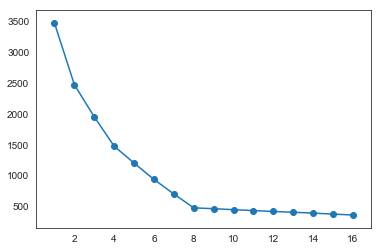

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 17):
    centroides = Centroides.iloc[:i, :]
    kmeans = KMeans(n_clusters=i, init=centroides, n_init=1, random_state=42).fit(Agrupamento)
    wcss.append(kmeans.inertia_)
plt.plot(np.arange(1, 17), wcss)
plt.scatter(np.arange(1, 17), wcss)
plt.show
print(round(wcss[7], 2))

# 2) Classificação - Ex.1

In [5]:
Classificacao1 = pd.read_csv('classificacao_1.csv')
Classificacao1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,target
0,-0.79207,-1.53485,0.60615,-2.27976,-1.43551,2.44272,-1.18421,1.83623,-2.79111,0.38763,-2.84928,-1.45238,-3.43264,-0.70667,-0.71361,-2.32598,-2.71869,-1.76932,0
1,0.21583,-0.93657,0.75756,0.37746,-2.60988,1.85922,2.62460,0.24354,-3.43729,-0.26536,1.34649,-1.45203,3.12942,2.18204,-0.95989,-2.69853,4.91233,0.09381,0
2,-0.32059,-2.16565,-1.63757,0.79361,-1.95570,-0.18525,-0.88095,-0.98657,-4.14707,1.61340,-0.68718,-1.17566,-0.04852,1.20091,1.55407,-3.31448,0.24915,3.10828,0
3,-0.12929,-0.06134,3.58236,-1.48172,1.41317,-1.47032,-1.05289,1.87866,-1.99177,1.13534,0.49201,-0.21985,-1.43865,-0.64562,-0.28754,3.76759,-3.87927,-0.74953,0
4,-1.85108,-3.65335,0.10311,-0.18259,-1.71422,1.21289,-2.22696,-1.53030,-2.15125,0.77353,-2.36629,-1.76121,-5.21324,-0.88661,-0.24870,0.90993,-0.10623,-1.38851,0


In [6]:
X01 = Classificacao1.drop('target', axis=1).values
y01 = Classificacao1['target'].values

from sklearn.svm import SVC
svm = SVC(C=1, kernel='linear', random_state=42)
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

f1_train = []
f1_test = []
for train_index, test_index in KFold(n_splits=10, random_state=42).split(X01, y01):
    X01_train, X01_test = X01[train_index], X01[test_index]
    y01_train, y01_test = y01[train_index], y01[test_index]
    svm.fit(X01_train, y01_train)
    f1_train.append(f1_score(y01_train, svm.predict(X01_train)))
    f1_test.append(f1_score(y01_test, svm.predict(X01_test)))
    
print(round(np.mean(f1_train), 2))
print(round(np.mean(f1_test), 2))

0.82
0.81


# 3) Classificação - Ex. 2

In [7]:
Classificacao2 = pd.read_csv('classificacao_2.csv')
Classificacao2.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,-0.79138,-1.45877,-0.61498,6.39546,-0.19283,-4.92609,3.72728,2.36581,0.60241,2.85597,2.52876,2.09155,0
1,0.79527,-0.14828,0.49140,0.10649,4.32203,-1.55355,-0.62966,-0.27509,4.06300,-1.11079,3.61077,1.11076,0
2,-2.30926,1.59887,1.23513,-4.49395,0.50298,4.10219,0.48356,-0.51920,-1.59507,1.75719,-1.71703,0.92375,1
3,1.97998,-2.71683,-0.73252,3.08358,3.52049,-0.61567,-0.06206,1.33451,0.75546,-1.56391,1.00917,1.66555,0
4,-1.22339,2.38761,-2.15763,-1.91316,1.31427,0.18067,-2.20922,1.43218,1.05498,0.18525,2.91384,-0.03258,1


In [8]:
X02 = Classificacao2.drop('target', axis=1).values
y02 = Classificacao2['target'].values

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.model_selection import KFold
from sklearn.metrics import auc, roc_curve

auc_train = []
auc_test = []
for train_index, test_index in KFold(n_splits=5, random_state=42).split(X02, y02):
    X02_train, X02_test = X02[train_index], X02[test_index]
    y02_train, y02_test = y02[train_index], y02[test_index]
    gnb.fit(X02_train, y02_train)
    fpr_train, tpr_train, _ = roc_curve(y02_train, gnb.predict_proba(X02_train)[:,1])
    auc_train.append(auc(fpr_train, tpr_train))
    fpr_test, tpr_test, _ = roc_curve(y02_test, gnb.predict_proba(X02_test)[:,1])
    auc_test.append(auc(fpr_test, tpr_test))

print(round(np.mean(auc_train), 2))
print(round(np.mean(auc_test), 2))

0.86
0.86


# 4) Regressão - Ex. 1

In [9]:
Regressao1 = pd.read_csv('regressao_1.csv')
Regressao1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,target
0,0.41175,-0.88594,1.56763,-1.23920,-0.50609,0.40241,-0.19910,-0.36066,0.79811,-1.31550,-0.97004,0.25646,-0.97230,0.57444,0.86559,0.26008,59.426681
1,-0.18248,0.25817,-2.06830,0.30318,0.55240,1.14899,-1.06234,-1.05560,-0.39798,1.07560,0.32977,1.39860,0.13139,1.66229,-1.64970,-1.19903,-124.336003
2,0.16163,-0.19307,0.60995,0.75154,-0.34150,-1.07175,0.82420,-0.70458,0.15541,-0.41075,-0.36719,-0.40403,-1.36095,-0.32300,-1.80617,-2.36065,-135.453843
3,0.77408,-0.22030,-1.50507,0.26270,-0.43915,0.61604,-0.07312,1.05734,0.74734,-0.02001,-0.53163,-0.01862,-1.02064,0.20504,-0.46479,0.51637,15.301539
4,0.56369,-2.03858,1.00566,-0.22191,1.87744,0.92188,1.32863,1.23291,0.64139,-0.51216,-0.11285,1.36791,0.16337,0.17806,-0.79946,0.49963,0.344680


In [10]:
from sklearn.preprocessing import StandardScaler
Regressao1_scale = pd.DataFrame(StandardScaler().fit_transform(Regressao1), columns=Regressao1.columns)

In [11]:
Regressao1_scale.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,target
0,0.374143,-0.866486,1.545855,-1.260905,-0.498529,0.419499,-0.160629,-0.322572,0.765017,-1.323024,-0.956110,0.273382,-0.985506,0.576588,0.925029,0.263475,0.459868
1,-0.215082,0.256197,-1.990181,0.326660,0.555942,1.157514,-1.035056,-1.017630,-0.439674,1.047395,0.333984,1.408763,0.131087,1.667795,-1.684373,-1.140402,-1.019209
2,0.126130,-0.186592,0.614486,0.788155,-0.334564,-1.037750,0.875932,-0.666550,0.117696,-0.426099,-0.357767,-0.383199,-1.378699,-0.323621,-1.846698,-2.258050,-1.108694
3,0.733421,-0.213312,-1.442425,0.284994,-0.431843,0.630678,-0.033017,1.095670,0.713882,-0.038739,-0.520977,-0.000070,-1.034411,0.206049,-0.455129,0.510064,0.104712
4,0.524803,-1.997540,0.999325,-0.213813,1.875952,0.933010,1.386898,1.271270,0.607170,-0.526632,-0.105328,1.378255,0.163441,0.178985,-0.802321,0.493957,-0.015674


In [12]:
X03 = Regressao1_scale.drop('target', axis=1).values
y03 = Regressao1_scale['target'].values

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=100, metric='minkowski', p=2)
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

r2_train = []
r2_test = []
for train_index, test_index in KFold(n_splits=5, random_state=42).split(X03, y03):
    X03_train, X03_test = X03[train_index], X03[test_index]
    y03_train, y03_test = y03[train_index], y03[test_index]
    knn.fit(X03_train, y03_train)
    r2_train.append(r2_score(y03_train, knn.predict(X03_train)))
    r2_test.append(r2_score(y03_test, knn.predict(X03_test)))
    
print(round(np.mean(r2_train), 2))
print(round(np.mean(r2_test), 2))

0.65
0.64


# 5) Regressão - Ex. 2

In [13]:
Regressao2 = pd.read_csv('regressao_2.csv')
Regressao2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,target
0,0.928565,-0.719700,-0.193906,-0.677486,-1.179784,-0.866473,-0.527861,-0.363196,-0.753120,-1.032732,-1.068407
1,-1.262432,-0.803072,-0.026298,0.070038,-1.223663,0.169027,0.677987,-0.170260,0.332584,0.504562,-0.476471
2,0.117189,0.853866,1.582002,1.481968,1.720371,0.209258,0.148371,1.694372,1.300706,1.236036,-6.258761
3,-0.148722,-0.133637,0.020990,-0.261777,-0.648657,-0.344005,0.689685,0.503188,0.034081,-0.003327,4.029771
4,-1.589064,-1.120601,-2.323954,-1.236945,-0.683011,-0.468862,-0.810920,-2.981145,-3.196629,-0.876743,-18.675821


In [14]:
X04 = Regressao2.drop('target', axis=1).values
y04 = Regressao2['target'].values

from sklearn.linear_model import ElasticNet
eln = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mse_train = []
mse_test = []
for train_index, test_index in KFold(n_splits=10, random_state=42).split(X04, y04):
    X04_train, X04_test = X04[train_index], X04[test_index]
    y04_train, y04_test = y04[train_index], y04[test_index]
    eln.fit(X04_train, y04_train)
    mse_train.append(mean_squared_error(y04_train, eln.predict(X04_train)))
    mse_test.append(mean_squared_error(y04_test, eln.predict(X04_test)))

print(round(np.mean(mse_train), 2))
print(round(np.mean(mse_test), 2))

100.2
102.4
